In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as mt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import scikitplot.metrics as splt

In [3]:
data = pd.read_csv("C:/Users/Rıdvan/DataSet/Wine.Quality.Whites.csv")
df = data.copy()
df.head()

Unnamed: 0  fixed.acidity  volatile.acidity  citric.acid  residual.sugar  \
0           1            7.0              0.27         0.36            20.7   
1           2            6.3              0.30         0.34             1.6   
2           3            8.1              0.28         0.40             6.9   
3           4            7.2              0.23         0.32             8.5   
4           5            7.2              0.23         0.32             8.5   

   chlorides  free.sulfur.dioxide  total.sulfur.dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            4898 non-null   int64  
 1   fixed.acidity         4898 non-null   float64
 2   volatile.acidity      4898 non-null   float64
 3   citric.acid           4898 non-null   float64
 4   residual.sugar        4898 non-null   float64
 5   chlorides             4898 non-null   float64
 6   free.sulfur.dioxide   4898 non-null   float64
 7   total.sulfur.dioxide  4898 non-null   float64
 8   density               4898 non-null   float64
 9   pH                    4898 non-null   float64
 10  sulphates             4898 non-null   float64
 11  alcohol               4898 non-null   float64
 12  quality               4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [5]:
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.columns = ["Sabit Asitlik","Uçucu Asitlik","Sitrik Asit","Kalan Şeker","Klorür","Serbest Kükürt Dioksit","Toplam Kükürt Dioksit","Yoğunluk","pH","Sülfat","Alkol","Kalite"]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sabit Asitlik           4898 non-null   float64
 1   Uçucu Asitlik           4898 non-null   float64
 2   Sitrik Asit             4898 non-null   float64
 3   Kalan Şeker             4898 non-null   float64
 4   Klorür                  4898 non-null   float64
 5   Serbest Kükürt Dioksit  4898 non-null   float64
 6   Toplam Kükürt Dioksit   4898 non-null   float64
 7   Yoğunluk                4898 non-null   float64
 8   pH                      4898 non-null   float64
 9   Sülfat                  4898 non-null   float64
 10  Alkol                   4898 non-null   float64
 11  Kalite                  4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
df.describe().T

count        mean        std      min         25%  \
Sabit Asitlik           4898.0    6.854788   0.843868  3.80000    6.300000   
Uçucu Asitlik           4898.0    0.278241   0.100795  0.08000    0.210000   
Sitrik Asit             4898.0    0.334192   0.121020  0.00000    0.270000   
Kalan Şeker             4898.0    6.391415   5.072058  0.60000    1.700000   
Klorür                  4898.0    0.045772   0.021848  0.00900    0.036000   
Serbest Kükürt Dioksit  4898.0   35.308085  17.007137  2.00000   23.000000   
Toplam Kükürt Dioksit   4898.0  138.360657  42.498065  9.00000  108.000000   
Yoğunluk                4898.0    0.994027   0.002991  0.98711    0.991723   
pH                      4898.0    3.188267   0.151001  2.72000    3.090000   
Sülfat                  4898.0    0.489847   0.114126  0.22000    0.410000   
Alkol                   4898.0   10.514267   1.230621  8.00000    9.500000   
Kalite                  4898.0    5.877909   0.885639  3.00000    5.000000   

                              50%       75%        max  
Sabit Asitlik             6.80000    7.3000   14.20000  
Uçucu Asitlik             0.26000    0.3200    1.10000  
Sitrik Asit               0.32000    0.3900    1.66000  
Kalan Şeker               5.20000    9.9000   65.80000  
Klorür                    0.04300    0.0500    0.34600  
Serbest Kükürt Dioksit   34.00000   46.0000  289.00000  
Toplam Kükürt Dioksit   134.00000  167.0000  440.00000  
Yoğunluk                  0.99374    0.9961    1.03898  
pH                        3.18000    3.2800    3.82000  
Sülfat                    0.47000    0.5500    1.08000  
Alkol                    10.40000   11.4000   14.20000  
Kalite                    6.00000    6.0000    9.00000

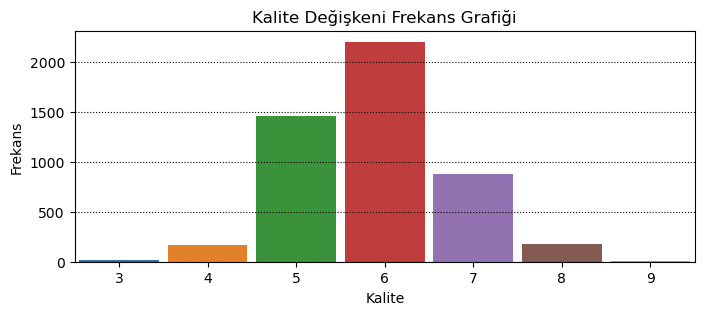

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: Kalite, dtype: int64

In [6]:
plt.figure(figsize = (8,3))
sns.countplot(x = df.Kalite, width = 0.9, )
plt.grid(axis = "y", ls = ":", color = "black")
plt.title("Kalite Değişkeni Frekans Grafiği")
plt.ylabel("Frekans")
plt.show()
df.Kalite.value_counts()

In [7]:
df["Kalite"].unique()

array([6, 5, 7, 8, 4, 3, 9], dtype=int64)

In [7]:
# Hiyerarşi
kategori = ["3","4","5","6","7","8","9"]

ordinal = OrdinalEncoder(categories = [kategori])
df["Kalite"] = ordinal.fit_transform(df["Kalite"].values.reshape(-1,1))
df["Kalite"].unique()

array([3., 2., 4., 5., 1., 0., 6.])

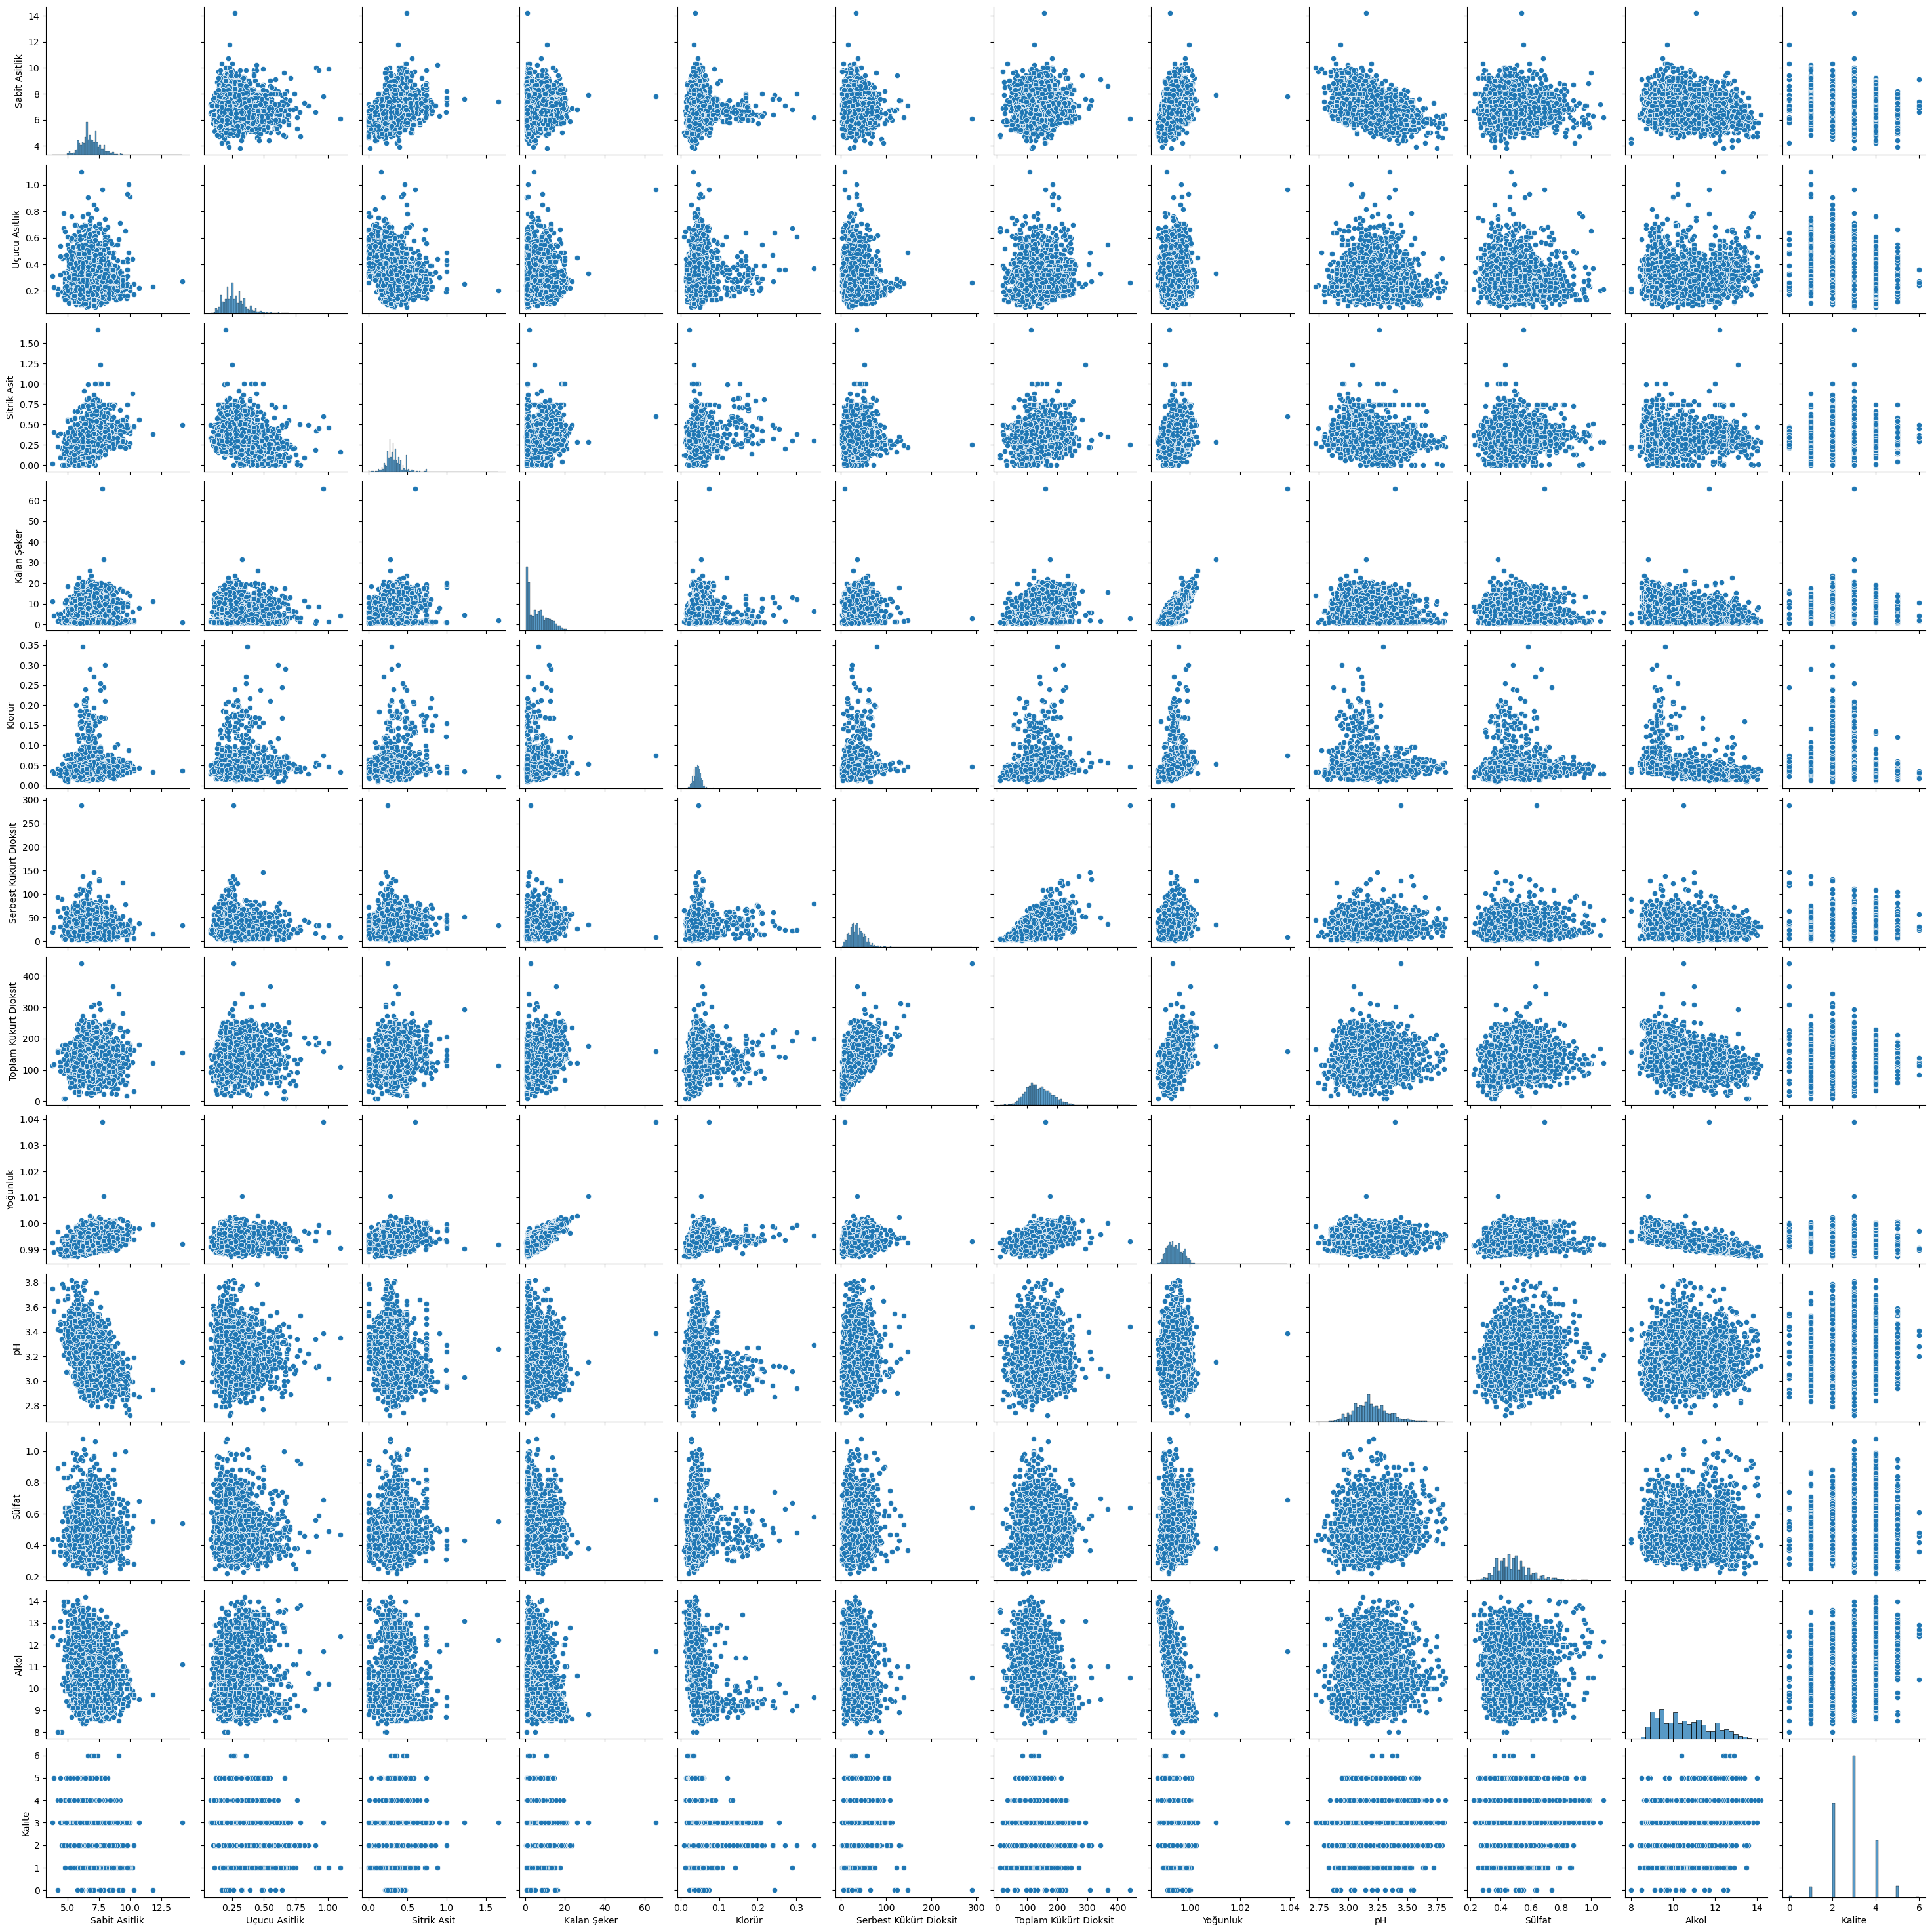

In [12]:
sns.pairplot(df)

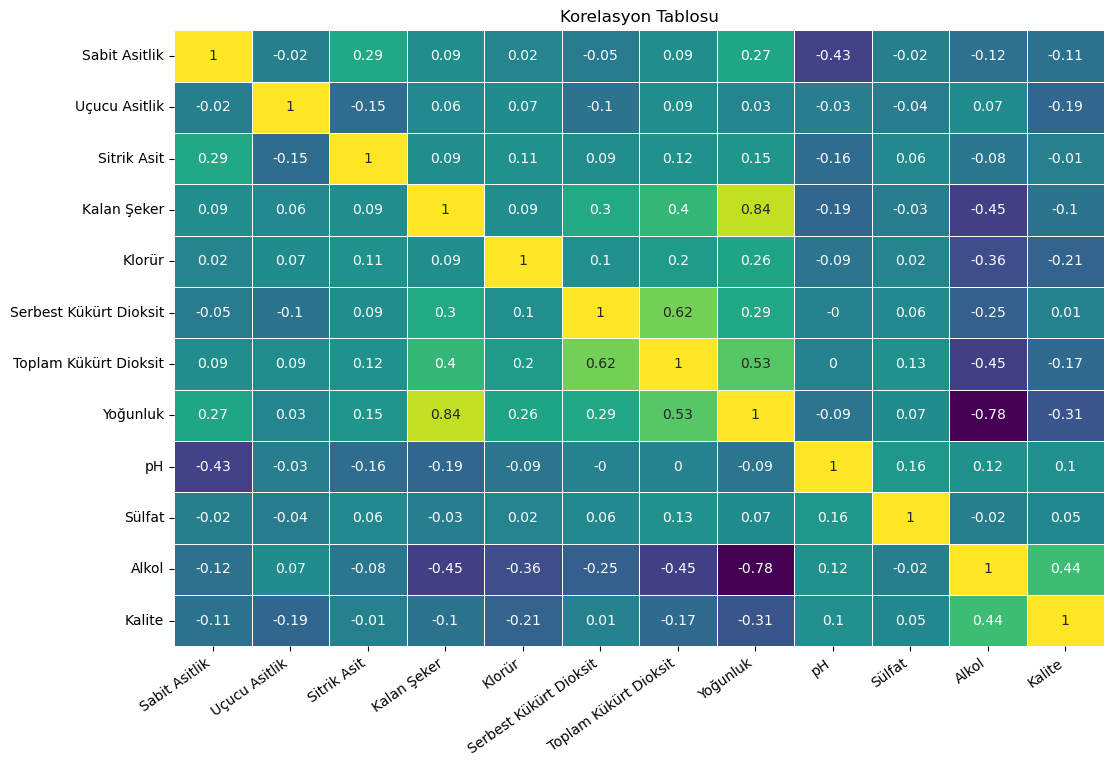

In [49]:
cor_mat = df.corr().round(2)
plt.figure(figsize = (12,8))
sns.heatmap(cor_mat, annot = True, lw = 0.5, cmap = "viridis", cbar = False)
plt.title("Korelasyon Tablosu")
plt.xticks(rotation = 35, ha = "right")
plt.show()

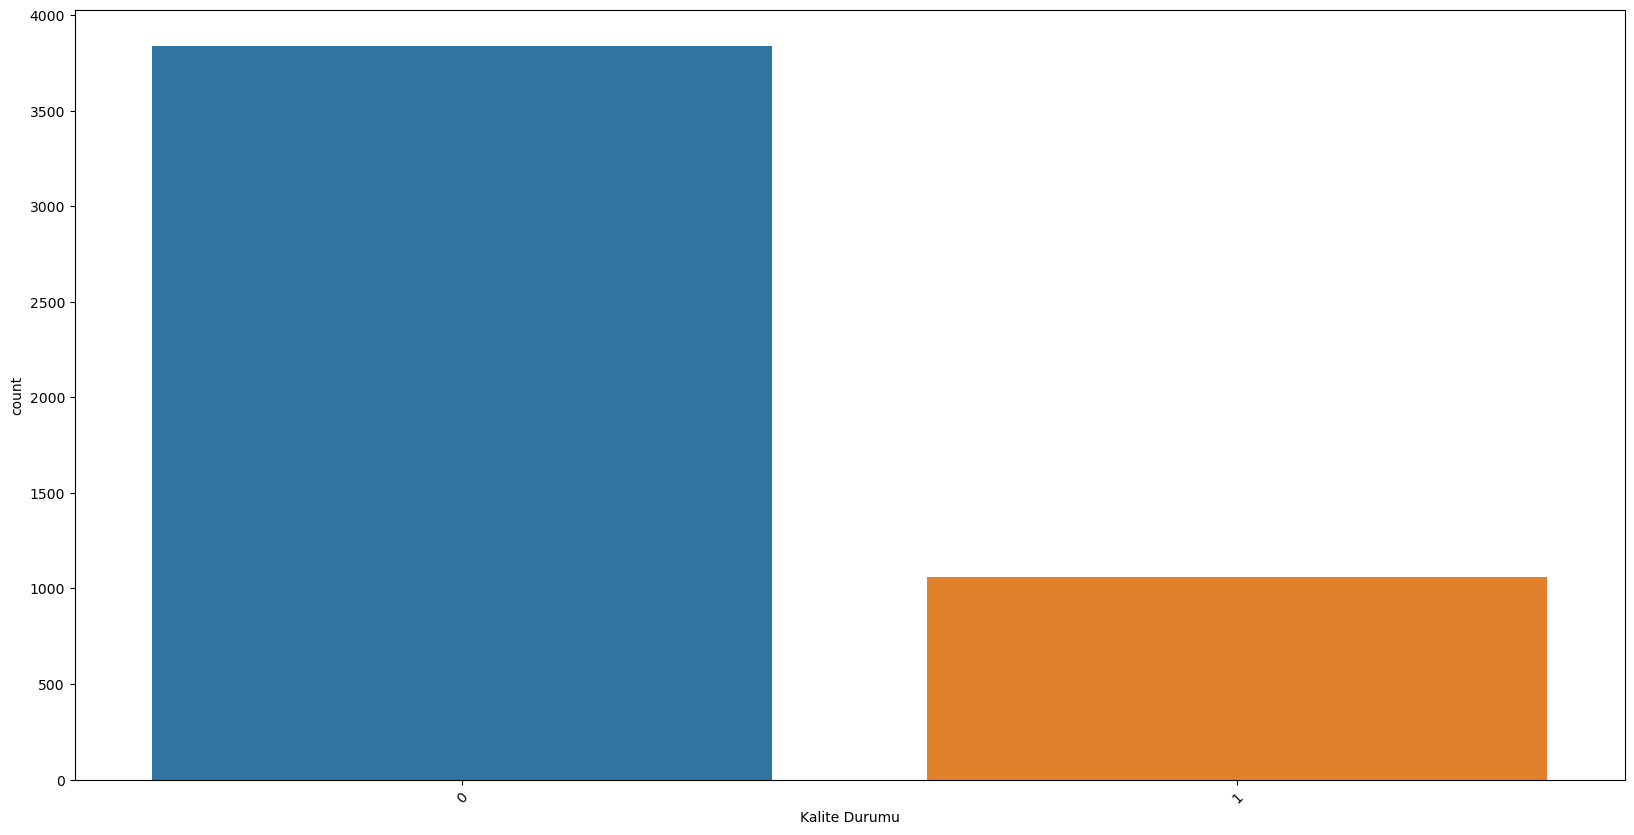

0    3838
1    1060
Name: Kalite Durumu, dtype: int64

In [74]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
sns.countplot(x = df["Kalite Durumu"])
plt.show()
df["Kalite Durumu"].value_counts()

### *ML*

In [97]:
df["Kalite Durumu"] = [1 if x>=5 else 0 for x in df['Kalite']]
print(df["Kalite Durumu"].unique())

[0 1]


In [98]:
X = df.drop(["Kalite", "Kalite Durumu"], axis = 1)
y = df["Kalite Durumu"]

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = .3,
                                                   random_state = 42)

In [99]:
# Standartlaştırma
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### *Lojistik Regresyon*

In [82]:
# Parametreler
parametreler = {"C": np.arange(0.0001, 0.001, 0.01)}
grid = GridSearchCV(estimator = log, param_grid = parametreler, cv = 10, n_jobs = -1)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'C': 0.0001}


In [131]:
log = LogisticRegression()
log.fit(X_train, y_train)
pred = log.predict(X_test)

log_egit = log.score(X_train,y_train)
log_test = log.score(X_test, y_test)
log_mse = mt.mean_squared_error(y_test, pred)

print("R2 Eğitim: {}\nR2 Test: {}\nMSE: {}".format(log_egit,log_test,log_mse))

R2 Eğitim: 0.9617852975495916
R2 Test: 0.9666666666666667
MSE: 0.03333333333333333


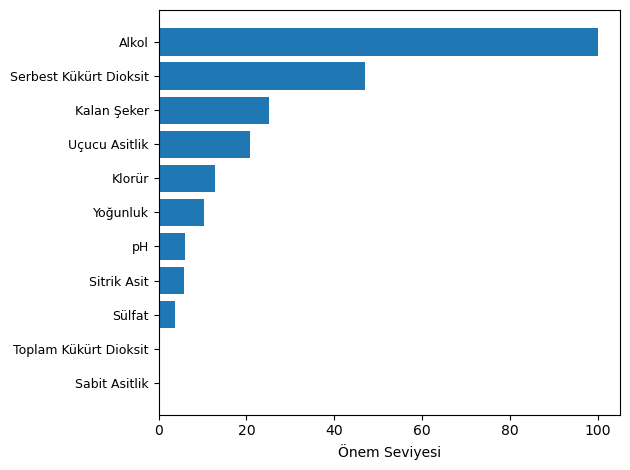

In [139]:
katsayilar = abs(log.coef_[0])                     # Bütün katsayıları mutlak değere aldık
katsayilar = 100 * (katsayilar / katsayilar.max()) # Max katsayıya böldük ve 100'le çarptık
sirali_index = np.argsort(katsayilar)              # Sıralnmış haldeki indexlerini döndürür
pos = np.arange(sirali_index.shape[0])

featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, katsayilar[sirali_index], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X.columns)[sirali_index], fontsize=9)
featax.set_xlabel('Önem Seviyesi')

plt.tight_layout()
plt.show()

### *KNN*

In [215]:
# Parametreler
parametreler = {"n_neighbors" : range(1,30)}
grid = GridSearchCV(estimator = knn, param_grid = parametreler, cv = 10, n_jobs = -1)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'n_neighbors': 4}


In [132]:
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

knn_egit = knn.score(X_train,y_train)
knn_test = knn.score(X_test, y_test)
knn_mse = mt.mean_squared_error(y_test, pred)

print("R2 Eğitim: {}\nR2 Test: {}\nMSE: {}".format(knn_egit,knn_test,knn_mse))

R2 Eğitim: 0.9673278879813302
R2 Test: 0.964625850340136
MSE: 0.03537414965986395


In [219]:
import mglearn

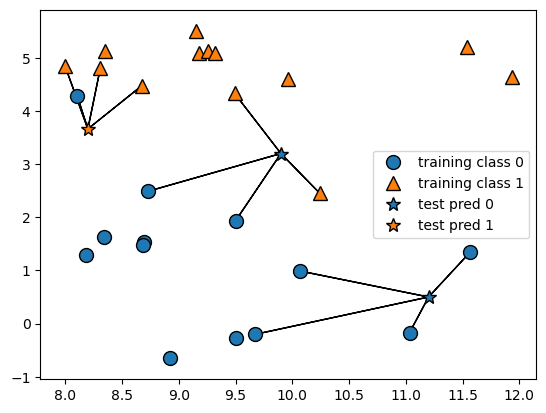

In [220]:
mglearn.plots.plot_knn_classification(n_neighbors = 4)

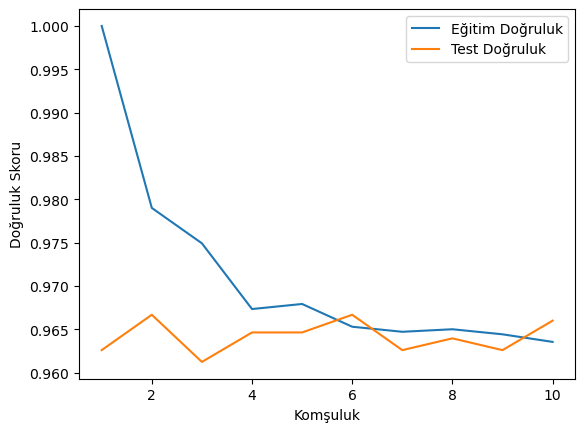

In [133]:
egitim_dogruluk = []
test_dogruluk = []

komsuluk = range(1,11)

for x in komsuluk:
    knn = KNeighborsClassifier(n_neighbors = x)
    knn.fit(X_train, y_train)
    egitim_dogruluk.append(knn.score(X_train, y_train))
    test_dogruluk.append(knn.score(X_test, y_test))
    
plt.plot(komsuluk, egitim_dogruluk, label = "Eğitim Doğruluk")
plt.plot(komsuluk, test_dogruluk, label = "Test Doğruluk")
plt.xlabel("Komşuluk")
plt.ylabel("Doğruluk Skoru")
plt.legend()
plt.show()

### *SVM*

In [17]:
parametreler = {"C" : [0.1,1.0,10.0,100.0], "gamma" : [0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(estimator = svm, param_grid = parametreler, cv = 10, n_jobs = -1)
grid.fit(X_train,y_train)
print(grid.best_params_)

{'C': 1.0, 'gamma': 1000.0}


In [134]:
svm = SVC(random_state = 0, C = 1.0, gamma = 1000.0)
svm.fit(X_train, y_train)
pred = svm.predict(X_test)

svm_egit = svm.score(X_train,y_train)
svm_test = svm.score(X_test, y_test)
svm_mse = mt.mean_squared_error(y_test, pred)

print("R2 Eğitim: {}\nR2 Test: {}\nMSE: {}".format(svm_egit,svm_test,svm_mse))

R2 Eğitim: 0.9994165694282381
R2 Test: 0.9775510204081632
MSE: 0.022448979591836733


In [30]:
%matplotlib inline

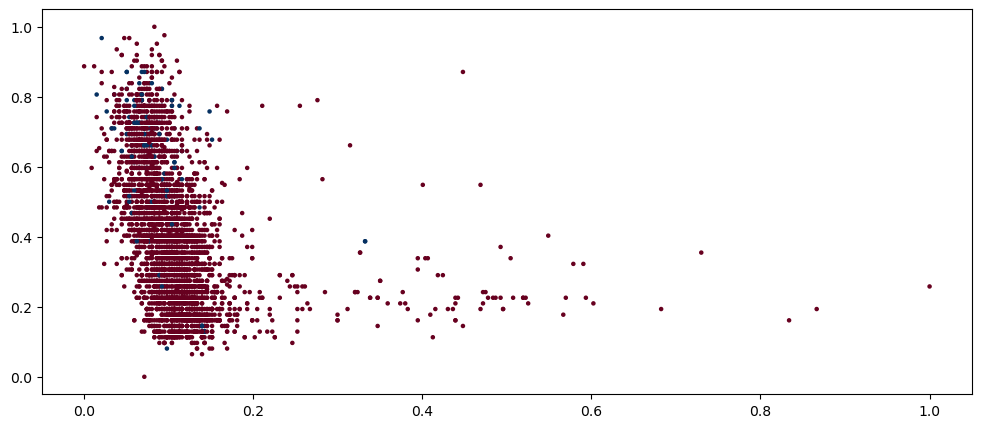

In [49]:
plt.figure(figsize = (12,5))
plt.scatter(X_train[:, 4], X_train[:, 10], c = y_train, s=5, cmap="RdBu")
plt.show()

### *Naive Bayes*

In [136]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
pred = bnb.predict(X_test)

bnb_egit = bnb.score(X_train,y_train)
bnb_test = bnb.score(X_test, y_test)
bnb_mse = mt.mean_squared_error(y_test, pred)

print("R2 Eğitim: {}\nR2 Test: {}\nMSE: {}".format(bnb_egit,bnb_test,bnb_mse))

R2 Eğitim: 0.9617852975495916
R2 Test: 0.9666666666666667
MSE: 0.03333333333333333


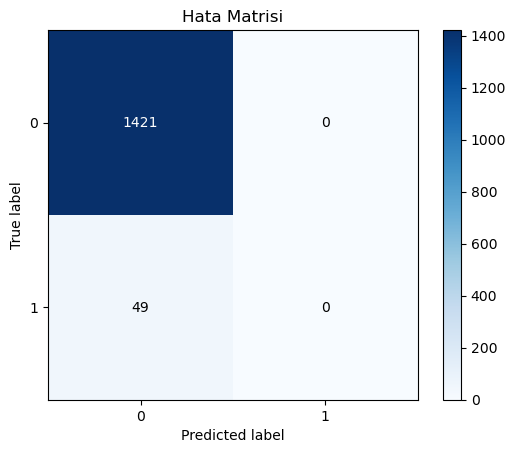

In [46]:
splt.plot_confusion_matrix(y_test, pred, title = "Hata Matrisi")
plt.show()

### *Karar Ağacı*

In [67]:
y_test.value_counts()

0    1421
1      49
Name: Kalite Durumu, dtype: int64

In [59]:
parametreler = {"max_depth": range(1,50)}
grid = GridSearchCV(dtc, param_grid = parametreler, cv = 10, n_jobs = -1)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 1}


In [100]:
dtc= DecisionTreeClassifier(random_state = 0,
                           max_depth = 1)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)

dtc_egit = dtc.score(X_train,y_train)
dtc_test = dtc.score(X_test, y_test)
dtc_mse = mt.mean_squared_error(y_test, pred)

print("R2 Eğitim: {}\nR2 Test: {}\nMSE: {}".format(dtc_egit,dtc_test,dtc_mse))

R2 Eğitim: 0.9617852975495916
R2 Test: 0.9666666666666667
MSE: 0.03333333333333333


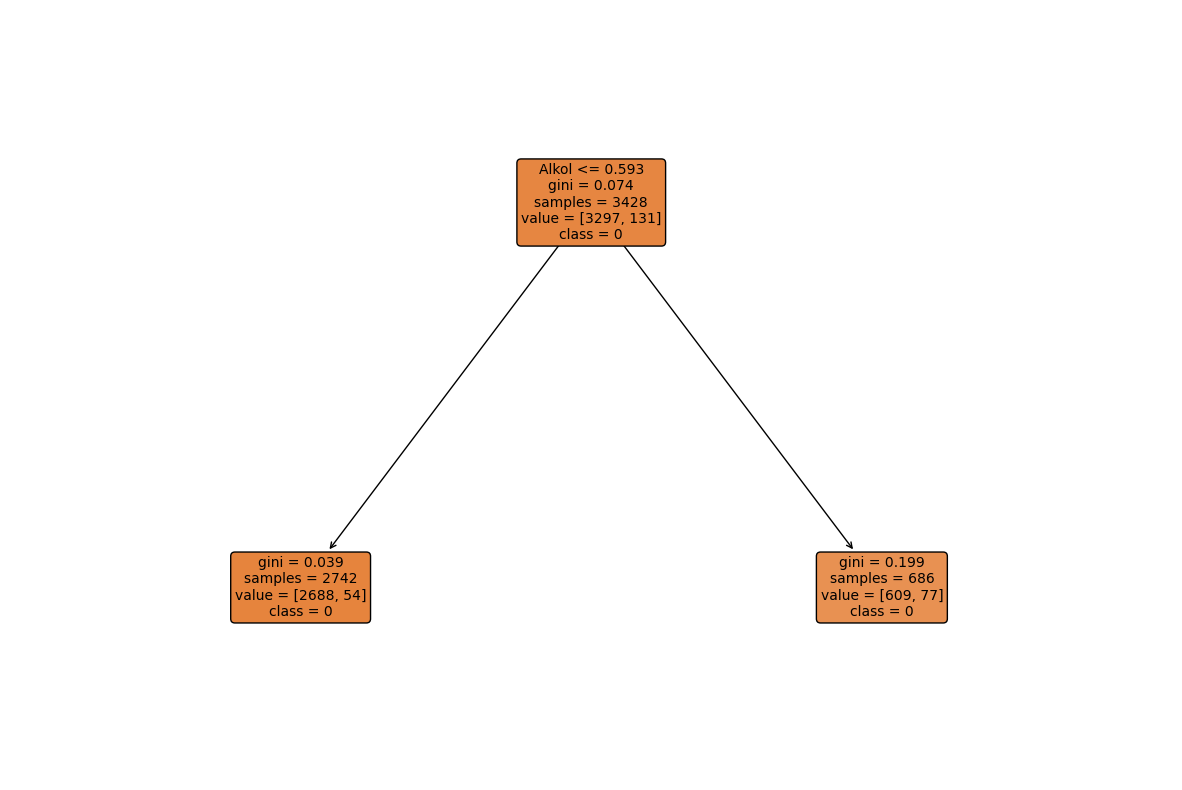

In [61]:
plt.figure(figsize=(15, 10), dpi=100)
plot_tree(dtc,
          feature_names= df.columns[:-1],  
          class_names=["0", "1"],
          rounded=True,
          filled=True,
          fontsize=10)
plt.show()

### *Random Frost*

In [110]:
parametreler = {"max_features": [1, 2, 4, 6],
                "min_samples_leaf" : [1,2,3,4],
               "max_depth": range(1,20)}
grid = GridSearchCV(rfc, param_grid = parametreler, cv = 10, n_jobs = -1)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 16, 'max_features': 1, 'min_samples_leaf': 1}


In [128]:
rfc = RandomForestClassifier(random_state = 0,
                            max_features = 1,
                            min_samples_leaf = 1,
                            max_depth = 16)
rfc.fit(X_train ,y_train)
pred = rfc.predict(X_test)

rfc_egit = rfc.score(X_train,y_train)
rfc_test = rfc.score(X_test, y_test)
rfc_mse = mt.mean_squared_error(y_test, pred)

print("R2 Eğitim: {}\nR2 Test: {}\nMSE: {}".format(rfc_egit,rfc_test,rfc_mse))

R2 Eğitim: 0.9991248541423571
R2 Test: 0.9782312925170068
MSE: 0.021768707482993196


In [127]:
decision_tree = rfc.estimators_[0]

plt.figure(figsize=(50, 50), dpi=200)
plot_tree(decision_tree,
          feature_names=df.columns[:-1],
          class_names=["0", "1"],
          rounded=True,
          filled=True,
          fontsize=10)
plt.show()

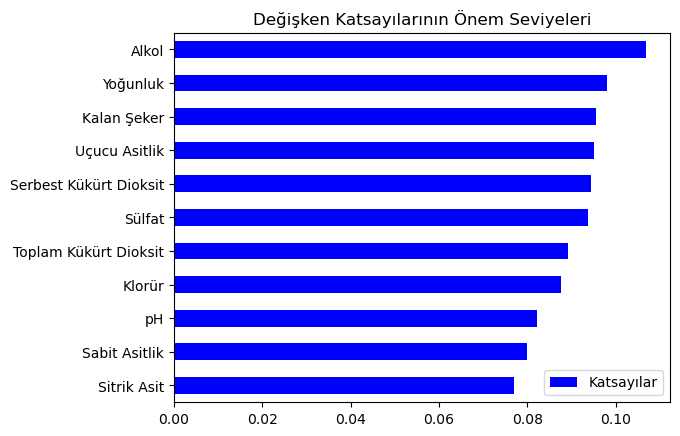

In [129]:
katsayılar = pd.DataFrame({"Katsayılar":rfc.feature_importances_}, 
                          index = X.columns)
katsayılar.sort_values(by = "Katsayılar", axis = 0, ascending = True).plot(kind = "barh", color = "blue")
plt.title("Değişken Katsayılarının Önem Seviyeleri")
plt.show()

## GENEL

In [143]:
values = [[log_egit,knn_egit,svm_egit,bnb_egit,dtc_egit,rfc_egit],
          [log_test,knn_test,svm_test,bnb_test,dtc_test,rfc_test],
          [log_mse,knn_mse,svm_mse,bnb_mse,dtc_mse,rfc_mse]]

title = ["Lojistik Regresyon", "K En Yakın Komşu", "Destek Vektör Makineleri", "Naive Bayes", "Karar Ağacı", "Rastgele Orman"]

Id = ["R2 Eğitim", "R2 Test", "MSE"]

pd.options.display.float_format="{:,.7f}".format

df = pd.DataFrame(data = values , index = Id, columns = title)
df.T

R2 Eğitim   R2 Test       MSE
Lojistik Regresyon        0.9617853 0.9666667 0.0333333
K En Yakın Komşu          0.9673279 0.9646259 0.0353741
Destek Vektör Makineleri  0.9994166 0.9775510 0.0224490
Naive Bayes               0.9617853 0.9666667 0.0333333
Karar Ağacı               0.9617853 0.9666667 0.0333333
Rastgele Orman            0.9991249 0.9782313 0.0217687

In [470]:
from lazypredict.Supervised import LazyClassifier
lc = LazyClassifier()
modeller, tahmin = lc.fit(X_train, X_test, y_train, y_test)
print(modeller.sort_values(by = "Accuracy", ascending = False))

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:06<00:00,  4.76it/s]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
RandomForestClassifier             0.98               0.71     0.71      0.98   
ExtraTreesClassifier               0.98               0.71     0.71      0.98   
XGBClassifier                      0.98               0.71     0.71      0.97   
LGBMClassifier                     0.97               0.73     0.73      0.97   
BaggingClassifier                  0.97               0.70     0.70      0.97   
LabelPropagation                   0.97               0.76     0.76      0.97   
LabelSpreading                     0.97               0.76     0.76      0.97   
AdaBoostClassifier                 0.97               0.54     0.54      0.95   
RidgeClassifierCV                  0.96               0.50     0.50      0.95   
SGDClassifier                      0.96               0.50     0.50      0.95   
LinearSVC                   

In [204]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [214]:
model = Sequential()
model.add(Dense(64, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(64, activation = "relu"))
model.add(Dense(1))

sgd = SGD(0.01)
model.compile(optimizer = sgd, loss = "mse", metrics = ["mean_squared_error"])

model.fit(X_train, y_train, epochs = 100)
pred = model.predict(X_test)

Epoch 1/100
108/108 [==============================] - 1s 3ms/step - loss: 0.0391 - mean_squared_error: 0.0391
Epoch 2/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0366 - mean_squared_error: 0.0366
Epoch 3/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0364 - mean_squared_error: 0.0364
Epoch 4/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0363 - mean_squared_error: 0.0363
Epoch 5/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0362 - mean_squared_error: 0.0362
Epoch 6/100
108/108 [==============================] - 0s 3ms/step - loss: 0.0361 - mean_squared_error: 0.0361
Epoch 7/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0360 - mean_squared_error: 0.0360
Epoch 8/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0359 - mean_squared_error: 0.0359
Epoch 9/100
108/108 [==============================] - 0s 2ms/step - loss: 0.0359 - mean_squared_error: 0.0359
E

In [211]:
model = Sequential()

# İlk katman
model.add(Dense(13,                             # Birim sayısına sahip
                activation = "relu",            # Aktivasyon fonksiyonu
                input_dim = X_train.shape[1],   # Katmanın giriş boyutu, veri setinin öznitelik sayısıdır.
                kernel_initializer = "normal"))

# İkinci bir gizli katman
model.add(Dense(6, activation = "relu", kernel_initializer = "normal"))

# Çıkış katmanını
model.add(Dense(1, kernel_initializer = "normal"))

model.compile(loss = "mse", 
              optimizer = "adam", 
              metrics = "mean_squared_error")

model.fit(X_train, y_train, epochs = 100,        # 100 epok boyunca eğit
          validation_data = (X_test, y_test),      # Doğrulama için x_val ve y_val veri setleri de kullanılır. 
          verbose = 0)                           # verbose=0 olduğu için her epoch'ta çıktı alınmaz.

sonuc = model.evaluate(X_test, y_test)
print("{}:{}".format(model.metrics_names[1], sonuc[1]))

46/46 [==============================] - 0s 2ms/step - loss: 0.0363 - mean_squared_error: 0.0363
mean_squared_error:0.03630177676677704


In [215]:
# Modelin tahminlerini yapın
pred = model.predict(X_test)

# R-kare değerini hesaplayın
r2 = mt.r2_score(y_test, pred)

# Sonucu yazdırın
print("R-kare değeri:", r2)

46/46 [==============================] - 0s 3ms/step
R-kare değeri: 0.04769604369359148
